# Project：用户购买预测
+ https://aistudio.baidu.com/aistudio/competition/detail/51
+ 数据集：train.csv 训练集，submission.csv 提交数据样例

## 提交结果
+ 上边结果提交，按照购买概率proba,从高到底排序，设置9月份购买人数为22803，结果为 0.54616
+ 按照购买概处理缺失值，异常值率proba,从高到底排序，设置9月份购买人数为22803，结果为 0.64537
+ 处理缺失值，异常值，异常值率proba,从高到底排序，设置9月份购买人数为22803，结果为 0.64531，该部分对结果提升不大
+ 5折交叉验证，异常值率proba,从高到底排序，设置9月份购买人数为22803，结果为 0.64614，该部分对结果提升不大
+ 借鉴优秀作业的特征工程，共220个特征，但是数据量太大了，比较粗暴的取了后100个特征，设置9月份购买人数为22803，结果为 0.68809
+ 借鉴优秀作业的阈值选取，设置大于概率平均值的都购买，结果为 0.71387

## 心得
+ 前边自己探索提分很慢
+ 后边借鉴了优秀作业，数据处理及阈值选取部分，特征工程做的非常详尽，但是计算机运行不了这么多特征，感触比较深的就是想要得高分，特征工程非常重要，同时算力也很重要，不然有那么多特征，但是算不出来
+ 后边会继续尝试，把特征增加一些去跑

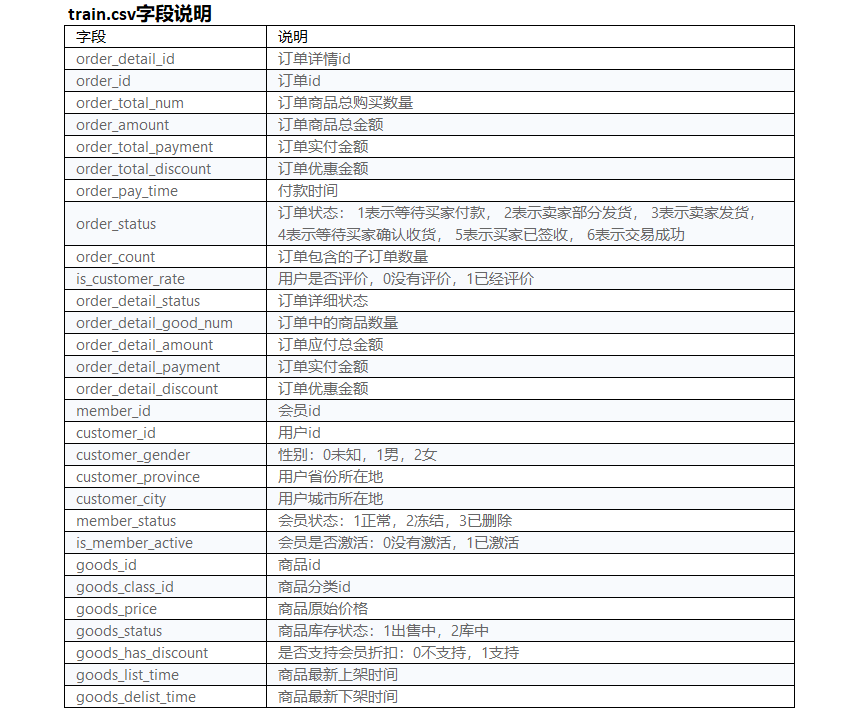

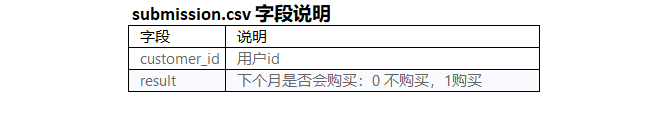

## 数据导入

In [1]:
import pandas as pd
# 观看Dataframe长度
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

# 显示多个结果
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# 警告忽略
import warnings
warnings.filterwarnings("ignore")

In [2]:
# 数据加载
raw = pd.read_csv('./train.csv')
raw

,order_detail_id,order_id,order_total_num,order_amount,order_total_payment,order_total_discount,order_pay_time,order_status,order_count,is_customer_rate,order_detail_status,order_detail_goods_num,order_detail_amount,order_detail_payment,order_detail_discount,customer_province,customer_city,member_id,customer_id,customer_gender,member_status,is_member_actived,goods_id,goods_class_id,goods_price,goods_status,goods_has_discount,goods_list_time,goods_delist_time
0,1000000,1000000,1.0,239.9,96.9,0.0,2012-11-01 00:10:56,6,1.0,0.0,6.0,1.0,96.9,96.9,143.0,北京,北京市,0.0,1000000,NaN,NaN,NaN,998,998,54.909289,1.0,0.0,2014-10-25 11:08:07,2014-11-01 11:08:07
1,1001530,1001327,2.0,288.0,96.9,0.0,2013-08-31 23:14:42,6,2.0,0.0,6.0,1.0,0.0,0.0,99.0,内蒙古自治区,鄂尔多斯市,0.0,1001324,NaN,NaN,NaN,1953,1953,45.961352,0.0,1.0,2013-08-28 17:27:50,2013-09-01 00:38:17
2,1001531,1001327,2.0,288.0,96.9,0.0,2013-08-31 23:14:42,6,2.0,0.0,6.0,1.0,96.9,96.9,92.1,内蒙古自治区,鄂尔多斯市,0.0,1001324,NaN,NaN,NaN,1083,1083,53.035439,1.0,0.0,2014-10-29 18:21:05,2014-11-05 18:21:05
3,1001532,1001328,3.0,180.0,89.7,0.0,2013-08-31 22:06:35,6,1.0,0.0,6.0,3.0,89.7,89.7,90.3,浙江省,杭州市,0.0,1001325,NaN,NaN,NaN,1013,1013,46.046917,1.0,1.0,2014-10-25 11:00:00,2014-11-01 11:00:00
4,1001533,1001329,1.0,159.9,65.9,0.0,2013-08-31 21:33:36,6,1.0,0.0,6.0,1.0,65.9,65.9,94.0,北京,北京市,0.0,1001326,NaN,NaN,NaN,1628,1628,50.722161,1.0,0.0,2014-10-23 15:35:33,2014-10-30 15:35:33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2306866,3685495,3238358,1.0,199.0,59.9,0.0,2013-01-10 19:24:31,6,1.0,0.0,6.0,1.0,59.9,59.9,139.1,山西省,晋中市,4158187.0,2826573,0.0,1.0,1.0,1173,1173,53.012016,1.0,0.0,2014-10-25 10:14:59,2014-11-01 10:14:59
2306867,3685496,3238359,2.0,299.8,89.9,0.0,2013-01-27 15:00:27,6,2.0,0.0,6.0,1.0,0.0,0.0,59.9,宁夏回族自治区,银川市,4160956.0,2826574,0.0,1.0,1.0,2513,2513,42.693822,2.0,0.0,2014-01-10 15:56:40,2014-01-11 12:46:19
2306868,3685497,3238359,2.0,299.8,89.9,0.0,2013-01-27 15:00:27,6,2.0,0.0,6.0,1.0,89.9,89.9,150.0,宁夏回族自治区,银川市,4160956.0,2826574,0.0,1.0,1.0,998,998,54.889036,1.0,0.0,2014-10-25 11:08:07,2014-11-01 11:08:07
2306869,3685498,3238360,1.0,168.0,76.9,0.0,2012-11-11 00:10:37,6,1.0,0.0,6.0,1.0,76.9,76.9,91.1,宁夏回族自治区,银川市,4160956.0,2826574,0.0,1.0,1.0,1423,1423,52.078004,1.0,0.0,2014-10-30 09:31:53,2014-11-06 09:31:53


In [3]:
raw_data = raw.copy()
raw_data

,order_detail_id,order_id,order_total_num,order_amount,order_total_payment,order_total_discount,order_pay_time,order_status,order_count,is_customer_rate,order_detail_status,order_detail_goods_num,order_detail_amount,order_detail_payment,order_detail_discount,customer_province,customer_city,member_id,customer_id,customer_gender,member_status,is_member_actived,goods_id,goods_class_id,goods_price,goods_status,goods_has_discount,goods_list_time,goods_delist_time
0,1000000,1000000,1.0,239.9,96.9,0.0,2012-11-01 00:10:56,6,1.0,0.0,6.0,1.0,96.9,96.9,143.0,北京,北京市,0.0,1000000,NaN,NaN,NaN,998,998,54.909289,1.0,0.0,2014-10-25 11:08:07,2014-11-01 11:08:07
1,1001530,1001327,2.0,288.0,96.9,0.0,2013-08-31 23:14:42,6,2.0,0.0,6.0,1.0,0.0,0.0,99.0,内蒙古自治区,鄂尔多斯市,0.0,1001324,NaN,NaN,NaN,1953,1953,45.961352,0.0,1.0,2013-08-28 17:27:50,2013-09-01 00:38:17
2,1001531,1001327,2.0,288.0,96.9,0.0,2013-08-31 23:14:42,6,2.0,0.0,6.0,1.0,96.9,96.9,92.1,内蒙古自治区,鄂尔多斯市,0.0,1001324,NaN,NaN,NaN,1083,1083,53.035439,1.0,0.0,2014-10-29 18:21:05,2014-11-05 18:21:05
3,1001532,1001328,3.0,180.0,89.7,0.0,2013-08-31 22:06:35,6,1.0,0.0,6.0,3.0,89.7,89.7,90.3,浙江省,杭州市,0.0,1001325,NaN,NaN,NaN,1013,1013,46.046917,1.0,1.0,2014-10-25 11:00:00,2014-11-01 11:00:00
4,1001533,1001329,1.0,159.9,65.9,0.0,2013-08-31 21:33:36,6,1.0,0.0,6.0,1.0,65.9,65.9,94.0,北京,北京市,0.0,1001326,NaN,NaN,NaN,1628,1628,50.722161,1.0,0.0,2014-10-23 15:35:33,2014-10-30 15:35:33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2306866,3685495,3238358,1.0,199.0,59.9,0.0,2013-01-10 19:24:31,6,1.0,0.0,6.0,1.0,59.9,59.9,139.1,山西省,晋中市,4158187.0,2826573,0.0,1.0,1.0,1173,1173,53.012016,1.0,0.0,2014-10-25 10:14:59,2014-11-01 10:14:59
2306867,3685496,3238359,2.0,299.8,89.9,0.0,2013-01-27 15:00:27,6,2.0,0.0,6.0,1.0,0.0,0.0,59.9,宁夏回族自治区,银川市,4160956.0,2826574,0.0,1.0,1.0,2513,2513,42.693822,2.0,0.0,2014-01-10 15:56:40,2014-01-11 12:46:19
2306868,3685497,3238359,2.0,299.8,89.9,0.0,2013-01-27 15:00:27,6,2.0,0.0,6.0,1.0,89.9,89.9,150.0,宁夏回族自治区,银川市,4160956.0,2826574,0.0,1.0,1.0,998,998,54.889036,1.0,0.0,2014-10-25 11:08:07,2014-11-01 11:08:07
2306869,3685498,3238360,1.0,168.0,76.9,0.0,2012-11-11 00:10:37,6,1.0,0.0,6.0,1.0,76.9,76.9,91.1,宁夏回族自治区,银川市,4160956.0,2826574,0.0,1.0,1.0,1423,1423,52.078004,1.0,0.0,2014-10-30 09:31:53,2014-11-06 09:31:53


## 异常值，缺失值处理

#### 缺失值探索

In [4]:
print(raw_data.isnull().sum())

order_detail_id                 0
order_id                        0
order_total_num                 0
order_amount                    0
order_total_payment             0
order_total_discount            0
order_pay_time                  0
order_status                    0
order_count                     0
is_customer_rate                0
order_detail_status             0
order_detail_goods_num          0
order_detail_amount             0
order_detail_payment            0
order_detail_discount           0
customer_province            1139
customer_city                1150
member_id                       0
customer_id                     0
customer_gender           1671081
member_status             1671081
is_member_actived         1671081
goods_id                        0
goods_class_id                  0
goods_price                   436
goods_status                    0
goods_has_discount              0
goods_list_time                 0
goods_delist_time               0
dtype: int64


In [5]:
# 查看数值类型
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2306871 entries, 0 to 2306870
Data columns (total 29 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_detail_id         int64  
 1   order_id                int64  
 2   order_total_num         float64
 3   order_amount            float64
 4   order_total_payment     float64
 5   order_total_discount    float64
 6   order_pay_time          object 
 7   order_status            int64  
 8   order_count             float64
 9   is_customer_rate        float64
 10  order_detail_status     float64
 11  order_detail_goods_num  float64
 12  order_detail_amount     float64
 13  order_detail_payment    float64
 14  order_detail_discount   float64
 15  customer_province       object 
 16  customer_city           object 
 17  member_id               float64
 18  customer_id             int64  
 19  customer_gender         float64
 20  member_status           float64
 21  is_member_actived       float64

In [6]:
# 查看数值类型
numerical_cols = raw_data.select_dtypes(exclude='object').columns
# 查看分类类型
categorical_cols = raw_data.select_dtypes(include='object').columns
print(numerical_cols,categorical_cols)

Index(['order_detail_id', 'order_id', 'order_total_num', 'order_amount',
       'order_total_payment', 'order_total_discount', 'order_status',
       'order_count', 'is_customer_rate', 'order_detail_status',
       'order_detail_goods_num', 'order_detail_amount', 'order_detail_payment',
       'order_detail_discount', 'member_id', 'customer_id', 'customer_gender',
       'member_status', 'is_member_actived', 'goods_id', 'goods_class_id',
       'goods_price', 'goods_status', 'goods_has_discount'],
      dtype='object') Index(['order_pay_time', 'customer_province', 'customer_city',
       'goods_list_time', 'goods_delist_time'],
      dtype='object')


#### 缺失值处理
+ 数值类型：goods_price
+ 分类类型：customer_province, customer_city, customer_gender, member_status, is_member_actived

In [7]:
raw_data.describe()

,order_detail_id,order_id,order_total_num,order_amount,order_total_payment,order_total_discount,order_status,order_count,is_customer_rate,order_detail_status,order_detail_goods_num,order_detail_amount,order_detail_payment,order_detail_discount,member_id,customer_id,customer_gender,member_status,is_member_actived,goods_id,goods_class_id,goods_price,goods_status,goods_has_discount
count,2.306871e+06,2.306871e+06,2.306871e+06,2.306871e+06,2.306871e+06,2.306871e+06,2.306871e+06,2.306871e+06,2.306871e+06,2.306871e+06,2.306871e+06,2.306871e+06,2.306871e+06,2.306871e+06,2.306871e+06,2.306871e+06,635790.000000,635790.0,635790.0,2.306871e+06,2.306871e+06,2.306435e+06,2.306871e+06,2.306871e+06
mean,2.340043e+06,2.136152e+06,1.684285e+00,3.108007e+02,1.114688e+02,5.908662e+00,9.858623e+00,1.767748e+00,3.141311e-02,1.035626e+01,1.175710e+00,8.664112e+01,8.279990e+01,1.338506e+02,5.789832e+05,1.933233e+06,0.079095,1.0,1.0,1.558213e+03,1.558213e+03,5.219550e+01,1.091712e+00,8.613616e-02
std,7.740314e+05,6.500690e+05,3.941060e+00,4.040238e+02,1.644054e+02,1.711463e+01,1.922945e+01,4.800121e+02,1.744315e-01,2.027679e+01,3.572079e+00,1.280135e+02,1.265916e+02,1.739157e+02,1.075381e+06,5.538885e+05,0.361848,0.0,0.0,7.803288e+02,7.803288e+02,6.325725e+00,3.937307e-01,2.805651e-01
min,1.000000e+06,1.000000e+06,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-1.011600e+02,0.000000e+00,1.000000e+06,0.000000,1.0,1.0,9.980000e+02,9.980000e+02,-7.997479e+01,0.000000e+00,0.000000e+00
25%,1.669684e+06,1.571484e+06,1.000000e+00,1.990000e+02,6.690000e+01,0.000000e+00,6.000000e+00,1.000000e+00,0.000000e+00,6.000000e+00,1.000000e+00,5.990000e+01,5.590000e+01,8.910000e+01,0.000000e+00,1.436434e+06,0.000000,1.0,1.0,1.038000e+03,1.038000e+03,4.960044e+01,1.000000e+00,0.000000e+00
50%,2.339350e+06,2.142988e+06,1.000000e+00,2.399000e+02,8.990000e+01,0.000000e+00,6.000000e+00,1.000000e+00,0.000000e+00,6.000000e+00,1.000000e+00,8.390000e+01,7.990000e+01,1.301000e+02,0.000000e+00,1.929569e+06,0.000000,1.0,1.0,1.233000e+03,1.233000e+03,5.390926e+01,1.000000e+00,0.000000e+00
75%,3.007430e+06,2.707954e+06,2.000000e+00,3.398000e+02,1.131700e+02,5.000000e+00,6.000000e+00,2.000000e+00,0.000000e+00,6.000000e+00,1.000000e+00,9.890000e+01,9.390000e+01,1.500000e+02,4.834840e+05,2.457816e+06,0.000000,1.0,1.0,1.643000e+03,1.643000e+03,5.485061e+01,1.000000e+00,0.000000e+00
max,3.685499e+06,3.238361e+06,1.700000e+03,1.023740e+05,9.840150e+04,1.960000e+03,1.010000e+02,7.290610e+05,1.000000e+00,1.010000e+02,1.700000e+03,9.840150e+04,9.840150e+04,7.936000e+04,4.161555e+06,2.826574e+06,2.000000,1.0,1.0,6.673000e+03,6.673000e+03,9.235260e+01,2.000000e+00,1.000000e+00


In [8]:
import numpy as np
np.median(raw_data['goods_price'])

nan

In [9]:
# nanmedian 沿指定轴计算中位数，而忽略nan
np.nanmedian(raw_data['goods_price'])

53.90926460868249

In [10]:
np.mean(raw_data['goods_price'])

52.19549968489304

In [11]:
# 数值类型,缺失值处理，众数中位数或者平均值，此处填充中位数
raw_data['goods_price'].fillna(np.nanmedian(raw_data['goods_price']),inplace=True)

In [12]:
raw_data['customer_province'].value_counts()

广东省         255700
江苏省         206593
浙江省         188219
河南省         131419
山东省         128916
上海          117625
湖北省         113378
湖南省         106706
安徽省         102575
江西省         102274
四川省          82279
福建省          81888
河北省          79617
北京           71394
辽宁省          59402
广西壮族自治区      54188
山西省          51759
陕西省          45786
天津           42147
黑龙江省         40328
云南省          40250
重庆           37459
贵州省          33775
内蒙古自治区       27119
吉林省          26839
新疆维吾尔自治区     23043
甘肃省          22440
海南省          15540
宁夏回族自治区       8134
青海省           5874
西藏自治区         3055
台湾              10
香港特别行政区          1
Name: customer_province, dtype: int64

In [13]:
# 分类类型,缺失值处理，众数填充
raw_data['customer_province'].fillna(raw_data['customer_province'].mode()[0],inplace=True)

In [14]:
raw_data['customer_province'].value_counts()

广东省         256839
江苏省         206593
浙江省         188219
河南省         131419
山东省         128916
上海          117625
湖北省         113378
湖南省         106706
安徽省         102575
江西省         102274
四川省          82279
福建省          81888
河北省          79617
北京           71394
辽宁省          59402
广西壮族自治区      54188
山西省          51759
陕西省          45786
天津           42147
黑龙江省         40328
云南省          40250
重庆           37459
贵州省          33775
内蒙古自治区       27119
吉林省          26839
新疆维吾尔自治区     23043
甘肃省          22440
海南省          15540
宁夏回族自治区       8134
青海省           5874
西藏自治区         3055
台湾              10
香港特别行政区          1
Name: customer_province, dtype: int64

In [15]:
raw_data['customer_city'].value_counts()

上海市      117625
北京市       71394
广州市       59772
杭州市       53752
武汉市       47894
          ...  
台中市           1
新北市           1
高雄市           1
可克达拉市         1
九龙            1
Name: customer_city, Length: 375, dtype: int64

In [16]:
raw_data['customer_city'].fillna(raw_data['customer_city'].mode()[0],inplace=True)

In [17]:
raw_data['customer_city'].value_counts()

上海市      118775
北京市       71394
广州市       59772
杭州市       53752
武汉市       47894
          ...  
台中市           1
新北市           1
高雄市           1
可克达拉市         1
九龙            1
Name: customer_city, Length: 375, dtype: int64

In [18]:
# 分类类型,缺失值处理，众数填充
raw_data['customer_gender'].fillna(raw_data['customer_gender'].mode()[0],inplace=True)
raw_data['member_status'].fillna(raw_data['member_status'].mode()[0],inplace=True)
raw_data['is_member_actived'].fillna(raw_data['is_member_actived'].mode()[0],inplace=True)

In [19]:
print(raw_data.isnull().sum())

order_detail_id           0
order_id                  0
order_total_num           0
order_amount              0
order_total_payment       0
order_total_discount      0
order_pay_time            0
order_status              0
order_count               0
is_customer_rate          0
order_detail_status       0
order_detail_goods_num    0
order_detail_amount       0
order_detail_payment      0
order_detail_discount     0
customer_province         0
customer_city             0
member_id                 0
customer_id               0
customer_gender           0
member_status             0
is_member_actived         0
goods_id                  0
goods_class_id            0
goods_price               0
goods_status              0
goods_has_discount        0
goods_list_time           0
goods_delist_time         0
dtype: int64


#### 异常值探索及处理

#### 处理离散型数据异常值

In [20]:
raw_data['order_status'].value_counts()

6      2089352
101      98145
3        79823
1        34618
4         4932
0            1
Name: order_status, dtype: int64

In [21]:
# 订单状态： 1表示等待买家付款， 2表示卖家部分发货， 3表示卖家发货， 4表示等待买家确认收货， 5表示买家已签收， 6表示交易成功
# 上边101和0是非正常状态
# 101 替换成2,0 替换成6
raw_data['order_status'].replace(101, 7, inplace=True)
raw_data['order_status'].replace(0, 6, inplace=True)

In [22]:
raw_data['order_status'].value_counts()

6    2089353
7      98145
3      79823
1      34618
4       4932
Name: order_status, dtype: int64

In [23]:
# 用户是否评价，0没有评价，1已经评价
raw_data['is_customer_rate'].value_counts()

0.0    2234405
1.0      72466
Name: is_customer_rate, dtype: int64

In [24]:
# 性别：0未知，1男，2女
raw_data['customer_gender'].value_counts()

0.0    2275051
2.0      18468
1.0      13352
Name: customer_gender, dtype: int64

In [25]:
# 会员状态：1正常，2冻结，3已删除
raw_data['member_status'].value_counts()

1.0    2306871
Name: member_status, dtype: int64

In [26]:
# 会员是否激活：0没有激活，1已激活
raw_data['is_member_actived'].value_counts()

1.0    2306871
Name: is_member_actived, dtype: int64

In [27]:
# 商品库存状态：1出售中，2库中
raw_data['goods_status'].value_counts()

1.0    1929848
2.0     294295
0.0      82728
Name: goods_status, dtype: int64

In [28]:
# 众数填充
raw_data['goods_status'].replace(0.0, 1.0, inplace=True)

In [29]:
raw_data['goods_status'].value_counts()

1.0    2012576
2.0     294295
Name: goods_status, dtype: int64

In [30]:
# 是否支持会员折扣：0不支持，1支持
raw_data['goods_has_discount'].value_counts()

0.0    2108166
1.0     198705
Name: goods_has_discount, dtype: int64

#### 处理连续型数据异常值

In [31]:
# 借鉴优秀作业
raw_data[raw_data["goods_price"]<0]

,order_detail_id,order_id,order_total_num,order_amount,order_total_payment,order_total_discount,order_pay_time,order_status,order_count,is_customer_rate,order_detail_status,order_detail_goods_num,order_detail_amount,order_detail_payment,order_detail_discount,customer_province,customer_city,member_id,customer_id,customer_gender,member_status,is_member_actived,goods_id,goods_class_id,goods_price,goods_status,goods_has_discount,goods_list_time,goods_delist_time
2312,1003841,1003239,1.0,0.01,0.01,0.0,2013-05-12 20:21:07,6,1.0,0.0,6.0,1.0,0.01,0.01,0.0,广东省,上海市,0.0,1003235,0.0,1.0,1.0,2538,2538,-12.965136,1.0,0.0,2014-10-28 09:43:51,2014-11-04 09:43:51
2523,1004052,1003440,1.0,0.01,0.01,0.0,2013-04-22 10:22:39,6,1.0,0.0,6.0,1.0,0.01,0.01,0.0,广东省,上海市,0.0,1003436,0.0,1.0,1.0,2538,2538,-9.717323,1.0,0.0,2014-10-28 09:43:51,2014-11-04 09:43:51
2822,1004351,1003720,23.0,23.00,23.00,0.0,2013-04-03 21:40:50,6,1.0,0.0,6.0,23.0,23.00,23.00,0.0,湖南省,常德市,0.0,1003716,0.0,1.0,1.0,1768,1768,-0.334533,1.0,0.0,2014-10-28 11:30:18,2014-11-04 11:30:18
5203,1006732,1005821,1.0,1.00,1.00,0.0,2013-01-24 22:00:31,6,1.0,0.0,6.0,1.0,1.00,1.00,0.0,湖北省,武汉市,0.0,1005816,0.0,1.0,1.0,3098,3098,-16.420158,2.0,0.0,2014-01-10 15:47:52,2014-01-11 12:46:23
6193,1007722,1006556,1.0,1.00,1.00,0.0,2013-01-09 14:13:06,6,1.0,0.0,6.0,1.0,1.00,1.00,0.0,山东省,烟台市,0.0,1006550,0.0,1.0,1.0,3278,3278,-7.076659,2.0,0.0,2013-01-09 14:00:00,2013-01-09 14:00:06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2300029,3676688,3231496,1.0,1.00,1.00,0.0,2012-11-10 00:12:45,6,1.0,0.0,6.0,1.0,1.00,1.00,0.0,北京,北京市,2677123.0,2821724,0.0,1.0,1.0,3643,3643,-1.584847,2.0,0.0,2012-11-08 08:10:27,2012-11-11 02:13:22
2300076,3676738,3231537,1.0,1.00,1.00,0.0,2012-11-10 07:50:43,6,1.0,0.0,6.0,1.0,1.00,1.00,0.0,广东省,东莞市,2681491.0,2821753,0.0,1.0,1.0,3643,3643,-0.104874,2.0,0.0,2012-11-08 08:10:27,2012-11-11 02:13:22
2300089,3676751,3231550,1.0,1.00,1.00,0.0,2012-11-11 00:30:44,6,1.0,0.0,6.0,1.0,1.00,1.00,0.0,湖南省,益阳市,2682544.0,2821761,0.0,1.0,1.0,3643,3643,-6.378413,2.0,0.0,2012-11-08 08:10:27,2012-11-11 02:13:22
2300239,3676903,3231661,1.0,1.00,1.00,0.0,2012-11-10 20:09:36,6,1.0,0.0,6.0,1.0,1.00,1.00,0.0,浙江省,温州市,2690110.0,2821834,0.0,1.0,1.0,3643,3643,-1.062541,2.0,0.0,2012-11-08 08:10:27,2012-11-11 02:13:22


In [32]:
nan_price_df = raw_data[raw_data["goods_price"]<0]
nan_price_df["goods_price"] = nan_price_df["order_amount"]/nan_price_df["order_total_num"] # 使用订单支付价/订单商品数 得到商品单价，进行填充
raw_data["goods_price"][raw_data["goods_price"]<0] = nan_price_df["goods_price"]# 使用计算后商品价格填充原始DF的缺失价格

In [33]:
raw_data[raw_data["goods_price"]<0]

,order_detail_id,order_id,order_total_num,order_amount,order_total_payment,order_total_discount,order_pay_time,order_status,order_count,is_customer_rate,order_detail_status,order_detail_goods_num,order_detail_amount,order_detail_payment,order_detail_discount,customer_province,customer_city,member_id,customer_id,customer_gender,member_status,is_member_actived,goods_id,goods_class_id,goods_price,goods_status,goods_has_discount,goods_list_time,goods_delist_time


In [34]:
# 借鉴优秀作业
# 5、商品ID进行LabelEncoder
raw_data["goods_id"] = pd.factorize(raw_data["goods_id"])[0]


# 6、对省份、城市LabelEncoder处理
label_encoder_list = ["customer_city","customer_province"]

for feature in label_encoder_list:
    raw_data[feature] = pd.factorize(raw_data[feature])[0]

#### 数据预处理

In [35]:
# 增加是否是会员，删除会员状态、激活状态、会员id
raw_data["is_member"] = raw_data["member_status"].fillna(0)

In [36]:
# 下个月，下下个月是几月？
# 数据截止到2013-08-31，下个月应该是9月份
print(max(raw_data['order_pay_time']))
# 如何构造训练集，测试集
# 2013-07-31前数据作为训练集，8月作为测试集，建模，然后把训练好的参数喂给模型，预测9月份的购买情况
# 训练集：时间在7月及之前
train_raw = raw_data[raw_data['order_pay_time'] <= '2013-07-31 23:59:59']
train_raw

2013-08-31 23:59:59


,order_detail_id,order_id,order_total_num,order_amount,order_total_payment,order_total_discount,order_pay_time,order_status,order_count,is_customer_rate,order_detail_status,order_detail_goods_num,order_detail_amount,order_detail_payment,order_detail_discount,customer_province,customer_city,member_id,customer_id,customer_gender,member_status,is_member_actived,goods_id,goods_class_id,goods_price,goods_status,goods_has_discount,goods_list_time,goods_delist_time,is_member
0,1000000,1000000,1.0,239.9,96.9,0.0,2012-11-01 00:10:56,6,1.0,0.0,6.0,1.0,96.9,96.9,143.0,0,0,0.0,1000000,0.0,1.0,1.0,0,998,54.909289,1.0,0.0,2014-10-25 11:08:07,2014-11-01 11:08:07,1.0
992,1002521,1002166,2.0,339.8,98.9,0.0,2013-07-31 22:25:51,6,2.0,0.0,6.0,1.0,98.9,98.9,141.0,27,213,0.0,1002163,0.0,1.0,1.0,0,998,54.851140,1.0,0.0,2014-10-25 11:08:07,2014-11-01 11:08:07,1.0
993,1002522,1002166,2.0,339.8,98.9,0.0,2013-07-31 22:25:51,6,2.0,0.0,6.0,1.0,0.0,0.0,99.9,27,213,0.0,1002163,0.0,1.0,1.0,146,2198,46.199457,1.0,0.0,2014-10-29 10:00:00,2014-11-05 10:00:00,1.0
994,1002523,1002167,3.0,179.7,93.7,0.0,2013-07-31 20:08:40,6,3.0,0.0,6.0,1.0,33.9,33.9,16.0,16,98,0.0,1002164,0.0,1.0,1.0,93,1343,39.124725,1.0,0.0,2014-10-25 20:52:40,2014-11-01 20:52:40,1.0
995,1002524,1002167,3.0,179.7,93.7,0.0,2013-07-31 20:08:40,6,3.0,0.0,6.0,1.0,29.9,29.9,20.0,16,98,0.0,1002164,0.0,1.0,1.0,93,1343,39.395491,1.0,0.0,2014-10-25 20:52:40,2014-11-01 20:52:40,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2306866,3685495,3238358,1.0,199.0,59.9,0.0,2013-01-10 19:24:31,6,1.0,0.0,6.0,1.0,59.9,59.9,139.1,27,213,4158187.0,2826573,0.0,1.0,1.0,115,1173,53.012016,1.0,0.0,2014-10-25 10:14:59,2014-11-01 10:14:59,1.0
2306867,3685496,3238359,2.0,299.8,89.9,0.0,2013-01-27 15:00:27,6,2.0,0.0,6.0,1.0,0.0,0.0,59.9,24,52,4160956.0,2826574,0.0,1.0,1.0,230,2513,42.693822,2.0,0.0,2014-01-10 15:56:40,2014-01-11 12:46:19,1.0
2306868,3685497,3238359,2.0,299.8,89.9,0.0,2013-01-27 15:00:27,6,2.0,0.0,6.0,1.0,89.9,89.9,150.0,24,52,4160956.0,2826574,0.0,1.0,1.0,0,998,54.889036,1.0,0.0,2014-10-25 11:08:07,2014-11-01 11:08:07,1.0
2306869,3685498,3238360,1.0,168.0,76.9,0.0,2012-11-11 00:10:37,6,1.0,0.0,6.0,1.0,76.9,76.9,91.1,24,52,4160956.0,2826574,0.0,1.0,1.0,43,1423,52.078004,1.0,0.0,2014-10-30 09:31:53,2014-11-06 09:31:53,1.0


In [37]:
# 下个月8月份 购买的用户集合
label_raw = set(raw_data[raw_data['order_pay_time'] > '2013-07-31 23:59:59']['customer_id'].dropna())
len(label_raw)

173385

In [38]:
# 按购买时间排序
raw_data.sort_values('order_pay_time', ascending=True, inplace=True)

In [39]:
import re
import datetime

In [40]:
def get_part_date_df(df,part_day):
    '''
    df 为原始数据集
    part_day 为需要提取的时间DF
    circle_list = [7,14,30,60,180,365,600]
    for part_day in circle_list:
        get_part_date_df(df,part_day)["order_pay_time"].min()
    '''
    
    global new_date_df
    
    # 进行深拷贝，避免影响原始数据集
    part_df = df.copy()
    # 将时间数据转化为datetime格式
    part_df["order_pay_time"] = part_df["order_pay_time"].astype(np.datetime64)

    # 获得最后一次的数据
    if part_day=="last":
        # 进行基于用户ID下的时间排序
        part_df = part_df.sort_values(["customer_id","order_pay_time"])
        # 提取最后一次的数据
        new_date_df = part_df.groupby("customer_id").last().reset_index()

    
    # 获得不不同时间段下的数据    
    else:
        end_time = part_df["order_pay_time"].max()
        start_time = end_time - datetime.timedelta(days=part_day)
        print("最小日期",start_time)
        new_date_df = part_df[part_df["order_pay_time"]>=start_time]
    
    return new_date_df

In [41]:
from tqdm.notebook import tqdm
### 构建时间特征

def creat_feature(df):
    import re
    # 构建每单购买时间差
    # 构建双11、双12特征
    print("正在构建时间特征")
    df["is_11"] = df["order_pay_time"].astype(str).apply(lambda x:int("11-11"in x))
    df["is_12"] = df["order_pay_time"].astype(str).apply(lambda x:int("12-12"in x))


    # 构建购买时间差
    df["order_pay_time"] = df["order_pay_time"].astype(np.datetime64)
    df = df.sort_values(["customer_id","order_pay_time"])
    # shift_time = df.groupby("customer_id")["order_pay_time"].shift(-1)
    # df["buy_freq_diff"] = shift_time - df["order_pay_time"]
    shift_time = df.groupby("customer_id")["order_pay_time"].shift(1)
    df["buy_freq_diff"] = df["order_pay_time"] - shift_time 

    df["buy_freq_diff"] = df["buy_freq_diff"].astype(str).apply(lambda x:re.sub("(-?\d+) days.*","\\1",x)) # 转化为数值
    df["buy_freq_diff"][df["buy_freq_diff"]=="NaT"]=np.nan
    df["buy_freq_diff"] = df["buy_freq_diff"].astype(float)
    df["buy_freq_diff"]



    ### 构建embedding特征
    from gensim.models import word2vec
    import multiprocessing 
    tqdm.pandas(desc="提取用户购买清单：")
    print("正在构建embedding特征")
    # 得到embedding的训练集（每一个用户购买的商品作为句子，购买时间先后有序）
    df["goods_id"]=df["goods_id"].astype(str)
    word_list = df.astype(str).sort_values(["customer_id","order_pay_time"]).groupby("customer_id")["goods_id"].progress_apply(lambda x:x.tolist())
    sentences = word_list.tolist()

    # 训练W2V模型
    model = word2vec.Word2Vec(sentences, size=5, window=3, min_count=1,workers=multiprocessing.cpu_count())

    # 得到所有商品id所对应的embedding array
    goods_embedding_array = df["goods_id"].apply(lambda x:model.wv[x])

    # 得到所有商品id所对应的DataFrame
    embedding_df = pd.DataFrame(goods_embedding_array.tolist(),index=df.index)
    embedding_df.columns = [f"good_eb_{i}" for i in embedding_df.columns]

    df = pd.concat([df,embedding_df],axis=1)


    ### 构建折扣特征
    print("正在构建折扣特征")
    df["is_discount"] = df["order_total_discount"].apply(lambda x:int(x>0))
    df["is_discount"].value_counts()
    
    return df

In [42]:
def get_personas(df):

    group_df = df.groupby("customer_id")# 反复用，提高效率

    ### 生成用户画像DF (索引为所有用户ID的空DF)
    user_df = pd.DataFrame(index=df["customer_id"].unique())


    ### 构建关于用户属性的特征 （U1）
    u1_list = ["customer_gender","customer_province","customer_city","is_member"]
    u1_df = group_df[u1_list].last().astype(int)
    u1_df.columns = [f"u1_{i}"for i in u1_df.columns]
    user_df = pd.concat([user_df,u1_df],axis=1)


    ### 构建关于用户属性的特征 （U1-Try）
    # 去过省份数
    user_df["u1_try_customer_province_nunique"] = group_df["customer_province"].nunique().astype(int)
    # 去过的城市数
    user_df["u1_try_customer_city_nunique"] = group_df["customer_city"].nunique().astype(int)
    # 去过的省份众数
    tem=df.groupby(["customer_id","customer_city"])["customer_city"].count().to_frame()
    tem.columns = ["counts"]
    user_df["u1_try_customer_city_mode"] = tem.groupby(["customer_id","customer_city"])["counts"].max().reset_index().drop_duplicates("customer_id").set_index("customer_id")["customer_city"]


    # 去过的城市众数
    tem=df.groupby(["customer_id","customer_province"])["customer_province"].count().to_frame()
    tem.columns = ["counts"]
    user_df["u1_try_customer_province_mode"]  = tem.groupby(["customer_id","customer_province"])["counts"].max().reset_index().drop_duplicates("customer_id").set_index("customer_id")["customer_province"]



    ### 构建关于用户属性的特征 二（U2）（raw）
    u2_raw_list = ["order_detail_id","order_id","member_id","is_member","customer_id","goods_id"]
    u2_raw_df = group_df[u2_raw_list].last()
    u2_raw_df.columns = [f"u2_raw_{i}_last" for i in u2_raw_df.columns]
    user_df = pd.concat([user_df,u2_raw_df],axis=1).astype(float)


    ### 构建关于用户属性的特征 二（U2）（norm）
    # 生成偏好商品 - goods_id的众数
    tem=df.groupby(["customer_id","goods_id"])["goods_id"].count().to_frame()
    tem.columns = ["counts"]
    df["u2_norm_goods_id_mode"] = tem.groupby(["customer_id","goods_id"])["counts"].max().reset_index().drop_duplicates("customer_id").set_index("customer_id")["goods_id"]


    # 生成购买时间差
    user_df["u2_norm_order_final_diff"] = user_df["u2_raw_order_id_last"].astype(int)/ int(df["order_id"].max()) 
    # 生成购买时长
    user_df["u2_norm_order_detail_final_diff"] = user_df["u2_raw_order_detail_id_last"].astype(int) / int(df["order_detail_id"].max()) 
     # 生成会员时长
    user_df["u2_norm_member_final_diff"] =  user_df["u2_raw_member_id_last"].astype(int)/int(df["member_id"].max())
     # 生成用户时长
    user_df["u2_norm_customer_final_diff"] = user_df["u2_raw_customer_id_last"].astype(int)/int(df["customer_id"].max())
    # 生成用户评价的次数
    user_df["u2_norm_customer_rate_count"] = group_df["is_customer_rate"].sum()
    # 生成用户的评价比例
    user_df["u2_norm_customer_rate_pct"] = group_df["is_customer_rate"].sum()/group_df["is_customer_rate"].count()

    ### 构建尝试特征（T1）（raw）
    user_df["t1_raw_goods_status_last"] = group_df["goods_status"].last()
    user_df["t1_raw_goods_has_discount_last"] = group_df["goods_has_discount"].last()
    t1_raw_goods_alive_time_last = group_df["goods_delist_time"].last().astype(np.datetime64) - group_df["goods_list_time"].last().astype(np.datetime64)
    t1_raw_goods_alive_time_last = t1_raw_goods_alive_time_last.astype(str).apply(lambda x:re.sub("(-?\d+) days.*","\\1",x)) # 转化为数值
    t1_raw_goods_alive_time_last[t1_raw_goods_alive_time_last=="NaT"]=np.nan
    t1_raw_goods_alive_time_last = t1_raw_goods_alive_time_last.astype(float)
    df["t1_raw_goods_alive_time_last"] = t1_raw_goods_alive_time_last
    

    ### 构建尝试特征（T1）（norm）
    # 1. goods_status 商品库存状态：（众数）
    tem = df.groupby(["customer_id","goods_status"])["goods_status"].count().to_frame()
    tem.columns = ["counts"]
    user_df["t1_norm_goods_status_mode"] = tem.groupby(["customer_id","goods_status"])["counts"].max().reset_index().drop_duplicates("customer_id").set_index("customer_id")["goods_status"]

    # 2. goods_has_discount 是否支持会员折扣：0不支持，1支持（众数）
    tem = df.groupby(["customer_id","goods_has_discount"])["goods_has_discount"].count().to_frame()
    tem.columns = ["counts"]
    user_df["t1_norm_goods_has_discount_mode"] = tem.groupby(["customer_id","goods_has_discount"])["counts"].max().reset_index().drop_duplicates("customer_id").set_index("customer_id")["goods_has_discount"]






    ### 构建RFM特征
    # 构建R
    #最近购买的间隙（最近尾时间差）
    df["order_pay_time"] = df["order_pay_time"].astype(np.datetime64)
    R_order_pay_time_final_diff_last = df["order_pay_time"].max()-group_df["order_pay_time"].last()
    R_order_pay_time_final_diff_last = R_order_pay_time_final_diff_last.astype(str).apply(lambda x:re.sub("(-?\d+) days.*","\\1",x)) # 转化为数值
    R_order_pay_time_final_diff_last[R_order_pay_time_final_diff_last=="NaT"]=np.nan
    R_order_pay_time_final_diff_last = R_order_pay_time_final_diff_last.astype(float)
    df["R_order_pay_time_final_diff_last"] = R_order_pay_time_final_diff_last

    # 每次购买间隙，即时间差均值
    user_df["R_order_pay_time_each_diff_mean"] = group_df["buy_freq_diff"].mean().fillna(9999)

    
    # 构建F
    user_df["F_order_count"] = group_df["order_id"].nunique() # 总订单数
    user_df["F_order_total_num_last"] = group_df["order_total_num"].last() # 最后一次的订单的商品数
    user_df["F_order_count_last"] = group_df["order_count"].last() # 最后一个订单的自订单数
    user_df["F_order_detail_good_num_last"] = group_df["order_detail_goods_num"].last()# 最后一次订单的商品数

    # 构建M
    user_df["M_order_amount_last"] = group_df["order_amount"].last() # 最后一次的订单总金额
    user_df["M_order_total_payment_last"] = group_df["order_total_payment"].last() # 最后一次的订单的实付金额
    user_df["M_order_total_discount_last"] = group_df["order_total_discount"].last() # 最后一次的订单的优惠金额
    user_df["M_order_detail_amount_last"] = group_df["order_detail_amount"].last() # 最后一次的订单的应付总金额
    user_df["M_order_detail_payment_last"] = group_df["order_detail_payment"].last() # 最后一次的订单的实付金额
    user_df["M_order_detail_discount_last"] = group_df["order_detail_discount"].last() # 最后一次的订单的商品的优惠金额
    user_df["M_goods_price_last"] = group_df["goods_price"].last() # 最后一次的订单的原始价格






    ### 构建RFM的统计值 + 划窗值
    circle_list = [7,14,30,60,90,120,150,180,210,240,270,300]
    circle_list = [30,90,180,360]
    stats_time_list = []

    for part_day in tqdm(circle_list):
        tem_df = get_part_date_df(df,part_day)

        tem_group_df = tem_df.groupby("customer_id")

        stats_dict = {
            "order_total_num": ["mean", "sum","max","min"], 
            "order_count":["mean", "sum","max","min"], 
            "order_detail_goods_num":["mean", "sum","max","min"],
            "order_amount":["mean", "sum","max","min"],
            "order_total_payment":["mean", "sum","max","min"],
            "order_total_discount":["mean", "sum","max","min"],
            "order_detail_amount":["mean", "sum","max","min"],
            "order_detail_payment":["mean", "sum","max","min"],
            "order_detail_discount":["mean", "sum","max","min"],
            "goods_price":["mean", "sum","max","min","std"]}

        stats_df = tem_group_df.agg(stats_dict)
        stats_df.columns = ["_".join(tup) for tup in stats_df.columns]
        stats_df.columns = [f"{i}_{part_day}d" for i in stats_df.columns]
        stats_time_list.append(stats_df)

    stats_time_df = pd.concat(stats_time_list,axis=1) # 生成划窗+统计值

    user_df = pd.concat([user_df,stats_time_df],axis=1)



    ### 关于用户属性的特征 三（U3）（clear）
    # 是否为老用户
    user_df["u3_clear_ord_user_1"] = df["customer_id"].mean()/group_df["customer_id"].last() # 以均值做分界点
    user_df["u3_clear_ord_user_2"] = df["customer_id"].quantile(q=3/4)/group_df["customer_id"].last() # 以3/4分位做分界点


    # 是否为老会员（不为零的均值、3/4值）
    df["member_id"][df["member_id"]==0]="9"*len(str(df["member_id"].max()))
    df["member_id"] = df["member_id"].astype(int)
    group_df = df.groupby("customer_id")
    user_df["u3_clear_ord_member_1"] = (df["member_id"][df["member_id"]>0].mean()/group_df["member_id"].last()).round(2).fillna(0)
    user_df["u3_clear_ord_member_2"] = (df["member_id"][df["member_id"]>0].quantile(q=3/4)/group_df["member_id"].last()).round(2).fillna(0)


    # 是否为死用户 （应该取间隔均值）
    user_df["u3_clear_dead_user_1"] = user_df["R_order_pay_time_each_diff_mean"]/user_df["R_order_pay_time_each_diff_mean"].mean()
    user_df["u3_clear_dead_user_2"] = user_df["R_order_pay_time_each_diff_mean"]/user_df["R_order_pay_time_each_diff_mean"].quantile(q=3/4)


    # 是否为商品忠实用户
    tem=df.groupby(["customer_id","goods_id"])["goods_id"].count().to_frame() # 取众数 -- 取各分类的count
    tem.columns = ["counts"] # 取众数 -- 改名
    goods_id_mode_num=tem.groupby(["customer_id","goods_id"])["counts"].max().reset_index() # 取众数--取最大count的分类，即众数
    goods_id_mode_num = goods_id_mode_num.drop_duplicates("customer_id").set_index("customer_id")["counts"] # 取众数的count数
    user_df["u3_clear_loyal_good_user"] = goods_id_mode_num/group_df["goods_id"].count() # 偏好商品购买数/自己总购买商品数 


    # 是否为平台忠诚客户
    user_df["u3_clear_loyal_platform_user"] = (group_df["goods_id"].count()/group_df["goods_id"].count().mean()).round(2) # 用户购买数/平台购买数


    # 消费档次
    # 100快速消费、100-1000日常消费、1000-10000大件消费、10000以上少见消费者
    def count_comsume_level(x):
        if x<=100:
            return 1
        elif 100<x<=1000:
            return 2
        elif 1000<x<=10000:
            return 3
        elif x>10000:
            return 4

    user_df["u3_clear_user_comsume_level"] = group_df["order_total_payment"].mean().apply(count_comsume_level)

    # 消费频次 (前置平均购买间隔时间 )
    # 周消费、月消费、季消费、半年消费、1年消费、大于一年消费
    def count_comsume_level(x):
        if x<=7:
            return 1
        elif 7<x<=30:
            return 2
        elif 30<x<=90:
            return 3
        elif 90<x<=180:
            return 4
        elif 180<x<=360:
            return 5
        elif x>360:
            return 6

    user_df["u3_clear_user_buy_freq"] = user_df["R_order_pay_time_each_diff_mean"].apply(count_comsume_level)


    # 用户参与度（自己评价次数/整体评价次数）
    user_df["u3_clear_user_participate"] = group_df["is_customer_rate"].sum()/group_df["is_customer_rate"].sum().mean()

    # 是否为羊毛党
    ##是否羊毛党1：折扣成交次数/总成交次
    user_df["u3_clear_bargin_hunter_1"] = df.groupby("customer_id")["is_discount"].sum()/df.groupby("customer_id")["is_discount"].sum().mean()
    ##是否羊毛党2：折扣金额/总金额
    user_df["u3_clear_bargin_hunter_2"] = group_df["order_total_payment"].sum() /group_df["order_amount"].sum()
    # 是否羊毛党3: 双11、双12购买数/平时购买数
    user_df["u3_clear_bargin_hunter_3"] = (group_df["is_11"].sum()+group_df["is_12"].sum())/group_df["order_id"].count()



    # 偏好商品：good_id —> embedding —> 均值
    good_prefer_embedding = group_df[["good_eb_0","good_eb_1","good_eb_2","good_eb_3","good_eb_4"]].mean()
    good_prefer_embedding.columns = [f"u3_clear_{i}" for i in good_prefer_embedding.columns]
    user_df = pd.concat([user_df,good_prefer_embedding],axis=1)

    # 缺失值处理
    print("时间划窗缺失值处理中...")
    miss_pct_df = (user_df.isnull().sum()[user_df.isnull().sum()>0]/user_df.shape[0]).round(2).sort_values()
#     del_list = miss_pct_df[miss_pct_df>0.5].index
#     stuff_list = miss_pct_df[miss_pct_df<=0.5].index.tolist()
    stuff_list = miss_pct_df.index.tolist()

#     user_df = user_df.drop(del_list,axis=1)

    for i in tqdm(stuff_list):
        try:
            user_df[i] = user_df[i].fillna(0)
        except Exception:
            print("错误：",i)

    print((user_df.isnull().sum()[user_df.isnull().sum()>0]/user_df.shape[0]).round(2).sort_values().to_string())

    return user_df

In [43]:
# 构建特征
print("构建训练集的特征")
train_feature = creat_feature(train_raw)
print("构建测试集集的特征")
test_feature = creat_feature(raw_data)

# 给所有的数据集构建用户画像
print("构建训练集的用户画像")
train_x = get_personas(train_feature)
print("构建测试集集的用户画像")
test_x = get_personas(test_feature)

构建训练集的特征
正在构建时间特征
正在构建embedding特征



正在构建折扣特征
构建测试集集的特征
正在构建时间特征
正在构建embedding特征



正在构建折扣特征
构建训练集的用户画像


最小日期 2013-07-01 23:59:45
最小日期 2013-05-02 23:59:45
最小日期 2013-02-01 23:59:45
最小日期 2012-08-05 23:59:45

时间划窗缺失值处理中...



Series([], )
构建测试集集的用户画像


最小日期 2013-08-01 23:59:59
最小日期 2013-06-02 23:59:59
最小日期 2013-03-04 23:59:59
最小日期 2012-09-05 23:59:59

时间划窗缺失值处理中...



Series([], )


In [44]:
train_x

,u1_customer_gender,u1_customer_province,u1_customer_city,u1_is_member,u1_try_customer_province_nunique,u1_try_customer_city_nunique,u1_try_customer_city_mode,u1_try_customer_province_mode,u2_raw_order_detail_id_last,u2_raw_order_id_last,u2_raw_member_id_last,u2_raw_is_member_last,u2_raw_customer_id_last,u2_raw_goods_id_last,u2_norm_order_final_diff,u2_norm_order_detail_final_diff,u2_norm_member_final_diff,u2_norm_customer_final_diff,u2_norm_customer_rate_count,u2_norm_customer_rate_pct,t1_raw_goods_status_last,t1_raw_goods_has_discount_last,t1_norm_goods_status_mode,t1_norm_goods_has_discount_mode,R_order_pay_time_each_diff_mean,F_order_count,F_order_total_num_last,F_order_count_last,F_order_detail_good_num_last,M_order_amount_last,M_order_total_payment_last,M_order_total_discount_last,M_order_detail_amount_last,M_order_detail_payment_last,M_order_detail_discount_last,M_goods_price_last,order_total_num_mean_30d,order_total_num_sum_30d,order_total_num_max_30d,order_total_num_min_30d,order_count_mean_30d,order_count_sum_30d,order_count_max_30d,order_count_min_30d,order_detail_goods_num_mean_30d,order_detail_goods_num_sum_30d,order_detail_goods_num_max_30d,order_detail_goods_num_min_30d,order_amount_mean_30d,order_amount_sum_30d,order_amount_max_30d,order_amount_min_30d,order_total_payment_mean_30d,order_total_payment_sum_30d,order_total_payment_max_30d,order_total_payment_min_30d,order_total_discount_mean_30d,order_total_discount_sum_30d,order_total_discount_max_30d,order_total_discount_min_30d,order_detail_amount_mean_30d,order_detail_amount_sum_30d,order_detail_amount_max_30d,order_detail_amount_min_30d,order_detail_payment_mean_30d,order_detail_payment_sum_30d,order_detail_payment_max_30d,order_detail_payment_min_30d,order_detail_discount_mean_30d,order_detail_discount_sum_30d,order_detail_discount_max_30d,order_detail_discount_min_30d,goods_price_mean_30d,goods_price_sum_30d,goods_price_max_30d,goods_price_min_30d,goods_price_std_30d,order_total_num_mean_90d,order_total_num_sum_90d,order_total_num_max_90d,order_total_num_min_90d,order_count_mean_90d,order_count_sum_90d,order_count_max_90d,order_count_min_90d,order_detail_goods_num_mean_90d,order_detail_goods_num_sum_90d,order_detail_goods_num_max_90d,order_detail_goods_num_min_90d,order_amount_mean_90d,order_amount_sum_90d,order_amount_max_90d,order_amount_min_90d,order_total_payment_mean_90d,order_total_payment_sum_90d,order_total_payment_max_90d,order_total_payment_min_90d,order_total_discount_mean_90d,order_total_discount_sum_90d,order_total_discount_max_90d,order_total_discount_min_90d,order_detail_amount_mean_90d,order_detail_amount_sum_90d,order_detail_amount_max_90d,order_detail_amount_min_90d,order_detail_payment_mean_90d,order_detail_payment_sum_90d,order_detail_payment_max_90d,order_detail_payment_min_90d,order_detail_discount_mean_90d,order_detail_discount_sum_90d,order_detail_discount_max_90d,order_detail_discount_min_90d,goods_price_mean_90d,goods_price_sum_90d,goods_price_max_90d,goods_price_min_90d,goods_price_std_90d,order_total_num_mean_180d,order_total_num_sum_180d,order_total_num_max_180d,order_total_num_min_180d,order_count_mean_180d,order_count_sum_180d,order_count_max_180d,order_count_min_180d,order_detail_goods_num_mean_180d,order_detail_goods_num_sum_180d,order_detail_goods_num_max_180d,order_detail_goods_num_min_180d,order_amount_mean_180d,order_amount_sum_180d,order_amount_max_180d,order_amount_min_180d,order_total_payment_mean_180d,order_total_payment_sum_180d,order_total_payment_max_180d,order_total_payment_min_180d,order_total_discount_mean_180d,order_total_discount_sum_180d,order_total_discount_max_180d,order_total_discount_min_180d,order_detail_amount_mean_180d,order_detail_amount_sum_180d,order_detail_amount_max_180d,order_detail_amount_min_180d,order_detail_payment_mean_180d,order_detail_payment_sum_180d,order_detail_payment_max_180d,order_detail_payment_min_180d,order_detail_discount_mean_180d,order_detail_discount_sum_180d,order_detail_dis

In [45]:
test_x

,u1_customer_gender,u1_customer_province,u1_customer_city,u1_is_member,u1_try_customer_province_nunique,u1_try_customer_city_nunique,u1_try_customer_city_mode,u1_try_customer_province_mode,u2_raw_order_detail_id_last,u2_raw_order_id_last,u2_raw_member_id_last,u2_raw_is_member_last,u2_raw_customer_id_last,u2_raw_goods_id_last,u2_norm_order_final_diff,u2_norm_order_detail_final_diff,u2_norm_member_final_diff,u2_norm_customer_final_diff,u2_norm_customer_rate_count,u2_norm_customer_rate_pct,t1_raw_goods_status_last,t1_raw_goods_has_discount_last,t1_norm_goods_status_mode,t1_norm_goods_has_discount_mode,R_order_pay_time_each_diff_mean,F_order_count,F_order_total_num_last,F_order_count_last,F_order_detail_good_num_last,M_order_amount_last,M_order_total_payment_last,M_order_total_discount_last,M_order_detail_amount_last,M_order_detail_payment_last,M_order_detail_discount_last,M_goods_price_last,order_total_num_mean_30d,order_total_num_sum_30d,order_total_num_max_30d,order_total_num_min_30d,order_count_mean_30d,order_count_sum_30d,order_count_max_30d,order_count_min_30d,order_detail_goods_num_mean_30d,order_detail_goods_num_sum_30d,order_detail_goods_num_max_30d,order_detail_goods_num_min_30d,order_amount_mean_30d,order_amount_sum_30d,order_amount_max_30d,order_amount_min_30d,order_total_payment_mean_30d,order_total_payment_sum_30d,order_total_payment_max_30d,order_total_payment_min_30d,order_total_discount_mean_30d,order_total_discount_sum_30d,order_total_discount_max_30d,order_total_discount_min_30d,order_detail_amount_mean_30d,order_detail_amount_sum_30d,order_detail_amount_max_30d,order_detail_amount_min_30d,order_detail_payment_mean_30d,order_detail_payment_sum_30d,order_detail_payment_max_30d,order_detail_payment_min_30d,order_detail_discount_mean_30d,order_detail_discount_sum_30d,order_detail_discount_max_30d,order_detail_discount_min_30d,goods_price_mean_30d,goods_price_sum_30d,goods_price_max_30d,goods_price_min_30d,goods_price_std_30d,order_total_num_mean_90d,order_total_num_sum_90d,order_total_num_max_90d,order_total_num_min_90d,order_count_mean_90d,order_count_sum_90d,order_count_max_90d,order_count_min_90d,order_detail_goods_num_mean_90d,order_detail_goods_num_sum_90d,order_detail_goods_num_max_90d,order_detail_goods_num_min_90d,order_amount_mean_90d,order_amount_sum_90d,order_amount_max_90d,order_amount_min_90d,order_total_payment_mean_90d,order_total_payment_sum_90d,order_total_payment_max_90d,order_total_payment_min_90d,order_total_discount_mean_90d,order_total_discount_sum_90d,order_total_discount_max_90d,order_total_discount_min_90d,order_detail_amount_mean_90d,order_detail_amount_sum_90d,order_detail_amount_max_90d,order_detail_amount_min_90d,order_detail_payment_mean_90d,order_detail_payment_sum_90d,order_detail_payment_max_90d,order_detail_payment_min_90d,order_detail_discount_mean_90d,order_detail_discount_sum_90d,order_detail_discount_max_90d,order_detail_discount_min_90d,goods_price_mean_90d,goods_price_sum_90d,goods_price_max_90d,goods_price_min_90d,goods_price_std_90d,order_total_num_mean_180d,order_total_num_sum_180d,order_total_num_max_180d,order_total_num_min_180d,order_count_mean_180d,order_count_sum_180d,order_count_max_180d,order_count_min_180d,order_detail_goods_num_mean_180d,order_detail_goods_num_sum_180d,order_detail_goods_num_max_180d,order_detail_goods_num_min_180d,order_amount_mean_180d,order_amount_sum_180d,order_amount_max_180d,order_amount_min_180d,order_total_payment_mean_180d,order_total_payment_sum_180d,order_total_payment_max_180d,order_total_payment_min_180d,order_total_discount_mean_180d,order_total_discount_sum_180d,order_total_discount_max_180d,order_total_discount_min_180d,order_detail_amount_mean_180d,order_detail_amount_sum_180d,order_detail_amount_max_180d,order_detail_amount_min_180d,order_detail_payment_mean_180d,order_detail_payment_sum_180d,order_detail_payment_max_180d,order_detail_payment_min_180d,order_detail_discount_mean_180d,order_detail_discount_sum_180d,order_detail_dis

#### 数据规格检查

In [46]:
train_x.shape
test_x.shape

# 检测特征是否一致
print("不一致的特征:")
train_x.columns[~(train_x.columns.isin(test_x.columns))]

# 检查有无缺失值
print("缺失数:")
train_x.isnull().sum()[train_x.isnull().sum()>0]
test_x.isnull().sum()[test_x.isnull().sum()>0]

(1435404, 219)

(1585986, 219)

不一致的特征:


Index([], dtype='object')

缺失数:


Series([], dtype: int64)

Series([], dtype: int64)

#### 构建label

In [48]:
# label_raw 下个月8月份 购买的用户集合
# 构造label,如果8月份在label_raw中，label=1,否则label=0
train_raw2 = train_x
train_raw2['label'] = train_x.index.map(lambda x: int(x in label_raw))
# 构造测试集
test = test_x

In [49]:
train_raw2.to_pickle('./train_3.pkl')
test.to_pickle('./test_3.pkl')

In [ ]:
import pickle
with open('./train_3.pkl', 'rb') as file:
    train_raw2 = pickle.load(file)
train_raw2

In [2]:
with open('./test_3.pkl', 'rb') as file:
    test = pickle.load(file)
test

,u1_customer_gender,u1_customer_province,u1_customer_city,u1_is_member,u1_try_customer_province_nunique,u1_try_customer_city_nunique,u1_try_customer_city_mode,u1_try_customer_province_mode,u2_raw_order_detail_id_last,u2_raw_order_id_last,...,u3_clear_user_buy_freq,u3_clear_user_participate,u3_clear_bargin_hunter_1,u3_clear_bargin_hunter_2,u3_clear_bargin_hunter_3,u3_clear_good_eb_0,u3_clear_good_eb_1,u3_clear_good_eb_2,u3_clear_good_eb_3,u3_clear_good_eb_4
1000000,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1000000.0,1000000.0,...,6,0.000000,0.000000,0.403918,0.000000,0.106032,0.386286,1.194726,-0.763835,-0.037985
1000014,0.0,17.0,30.0,1.0,1.0,1.0,30.0,17.0,1181340.0,1155016.0,...,6,0.000000,0.000000,0.515012,0.000000,-1.704749,-1.530140,1.079090,-0.456051,-0.726256
1000034,0.0,12.0,23.0,1.0,1.0,1.0,23.0,12.0,1183974.0,1157250.0,...,1,0.000000,0.000000,0.333222,0.000000,0.458736,0.400779,1.377476,-0.612077,-0.105897
1000046,0.0,12.0,22.0,1.0,1.0,1.0,22.0,12.0,1148439.0,1126955.0,...,6,21.885933,0.000000,0.498750,0.000000,1.479443,-1.733027,-2.897245,0.460102,-1.121220
1000048,0.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2791333.0,2528288.0,...,6,0.000000,0.000000,0.374739,1.000000,0.106032,0.386286,1.194726,-0.763835,-0.037985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2826570,0.0,19.0,59.0,1.0,1.0,1.0,59.0,19.0,3685486.0,3238354.0,...,6,0.000000,0.000000,0.499750,0.000000,-0.056136,0.272527,1.836432,-0.006620,-2.278373
2826571,0.0,9.0,24.0,1.0,1.0,1.0,24.0,9.0,3685487.0,3238355.0,...,6,21.885933,0.000000,0.461124,0.000000,-1.704749,-1.530140,1.079090,-0.456051,-0.726256
2826572,0.0,2.0,121.0,1.0,1.0,1.0,121.0,2.0,3685494.0,3238357.0,...,2,0.000000,17.592495,0.343065,0.571429,-1.323631,0.953652,1.741731,-1.965826,0.003964
2826573,0.0,27.0,213.0,1.0,1.0,1.0,213.0,27.0,3685495.0,3238358.0,...,6,0.000000,0.000000,0.301005,0.000000,-1.001014,0.829671,2.435726,-1.540394,-0.402812


In [6]:
# 特征太多，运行不出来结果,取100个特征
train_raw2 = train_raw2.iloc[:,120:]
test = test.iloc[:,120:]

In [7]:
# reset_index 目的是做统一的逻辑，reset_index后把原来的index customer_id 当成了一个固定的列
train_raw2 = train_raw2.reset_index()
test = test.reset_index()

In [8]:
X_data = train_raw2.drop(['label', 'index'], axis=1)
Y_data = train_raw2['label']
X_test = test.drop('index', axis=1)

In [7]:
import lightgbm as lgb
# LGBMClassifier经验参数
clf = lgb.LGBMClassifier(
            num_leaves=2**5-1, reg_alpha=0.25, reg_lambda=0.25, objective='binary',
            max_depth=-1, learning_rate=0.005, min_child_samples=3, random_state=2021,
            n_estimators=2000, subsample=1, colsample_bytree=1,
        )

In [8]:
Y_data

0          0
1          0
2          0
3          0
4          0
          ..
1435399    0
1435400    0
1435401    0
1435402    0
1435403    0
Name: label, Length: 1435404, dtype: int64

In [9]:
%%time
clf.fit(X_data, Y_data)

CPU times: user 1h 3min 38s, sys: 12min 50s, total: 1h 16min 28s
Wall time: 4min 58s


LGBMClassifier(colsample_bytree=1, learning_rate=0.005, min_child_samples=3,
               n_estimators=2000, objective='binary', random_state=2021,
               reg_alpha=0.25, reg_lambda=0.25, subsample=1)

In [11]:
y_pred = clf.predict_proba(X_test)[:, 1]

In [13]:
print(y_pred)
print(len(y_pred))

[0.01131896 0.04188459 0.02914997 ... 0.00967259 0.0091533  0.08866052]
1585986


In [15]:
import pandas as pd
result = pd.read_csv('./submittion.csv')
result['result'] = y_pred

In [16]:
result2 = result.sort_values('result', ascending=False).copy()
buy_number = 173385
result2.index = range(len(result2))
result2.loc[result2.index <= buy_number, 'result'] = 1
result2.loc[result2.index > buy_number, 'result'] = 0
result2.sort_values('customer_id', ascending=True, inplace=True)
result2.to_csv('./baseline6.csv', index=False)

In [20]:
result2

,customer_id,result
518948,1000000,0.0
102379,1000014,1.0
156595,1000034,1.0
84987,1000046,1.0
536551,1000048,0.0
...,...,...
268566,2826570,0.0
603404,2826571,0.0
621109,2826572,0.0
648964,2826573,0.0


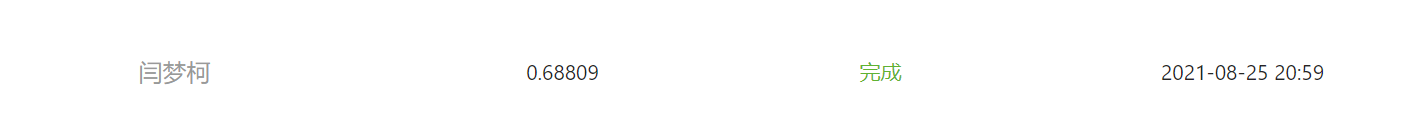

In [1]:
# 借鉴优秀作业，调整阈值为均值
# tem_df = test_x

# # 使用数据集进行预测
# pred_y_proba = model.predict_proba(tem_df)[:,1]

pred_y_proba = y_pred
# 查询阈值的平均水平
mean_threshold = pred_y_proba.mean()

# 重新设置阈值、输出预测结果
pred_y = pd.Series(pred_y_proba).apply(lambda x:1 if x >= mean_threshold else 0)
pred_df = pd.DataFrame(pred_y,columns=["result"]).set_index(result2.index)
pred_df = pred_df.reset_index()
pred_df = pred_df.rename(columns={"index":"customer_id"})
pred_df["result"].value_counts()
pred_df

NameError: name 'y_pred' is not defined

In [19]:
pred_df.to_csv('./baseline7.csv', index=False)

In [2]:
import pandas as pd
pred_df = pd.read_csv('./baseline7.csv')
pred_df

,customer_id,result
0,0,0
1,1,1
2,2,1
3,3,1
4,4,0
...,...,...
1585981,1585981,1
1585982,1585982,0
1585983,1585983,0
1585984,1585984,0


In [4]:
result2 = pd.read_csv('./baseline6.csv')
result2

,customer_id,result
0,1000000,0.0
1,1000014,1.0
2,1000034,1.0
3,1000046,1.0
4,1000048,0.0
...,...,...
1585981,2826570,0.0
1585982,2826571,0.0
1585983,2826572,0.0
1585984,2826573,0.0


In [5]:
pred_df["customer_id"] = result2["customer_id"]

In [6]:
pred_df

,customer_id,result
0,1000000,0
1,1000014,1
2,1000034,1
3,1000046,1
4,1000048,0
...,...,...
1585981,2826570,1
1585982,2826571,0
1585983,2826572,0
1585984,2826573,0


In [7]:
pred_df.to_csv('./baseline7.csv', index=False)

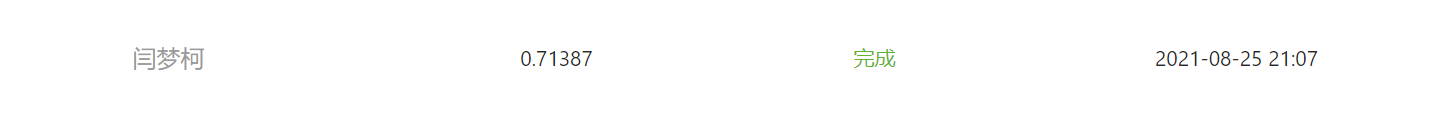

In [1]:
import pickle
with open('./train_3.pkl', 'rb') as file:
    train_raw2 = pickle.load(file)
train_raw2

,u1_customer_gender,u1_customer_province,u1_customer_city,u1_is_member,u1_try_customer_province_nunique,u1_try_customer_city_nunique,u1_try_customer_city_mode,u1_try_customer_province_mode,u2_raw_order_detail_id_last,u2_raw_order_id_last,...,u3_clear_user_participate,u3_clear_bargin_hunter_1,u3_clear_bargin_hunter_2,u3_clear_bargin_hunter_3,u3_clear_good_eb_0,u3_clear_good_eb_1,u3_clear_good_eb_2,u3_clear_good_eb_3,u3_clear_good_eb_4,label
1000000,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1000000.0,1000000.0,...,0.00000,0.000000,0.403918,0.000000,0.798603,1.116026,0.973293,-0.272175,-1.145431,0
1000034,0.0,12.0,23.0,1.0,1.0,1.0,23.0,12.0,1183975.0,1157250.0,...,0.00000,0.000000,0.333222,0.000000,1.034182,1.209541,1.464695,-0.200369,-1.204656,0
1000046,0.0,12.0,22.0,1.0,1.0,1.0,22.0,12.0,1148439.0,1126955.0,...,19.92897,0.000000,0.498750,0.000000,0.965197,-2.623748,-2.801107,0.330073,-0.476942,0
1000048,0.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2791333.0,2528288.0,...,0.00000,0.000000,0.374739,1.000000,0.798603,1.116026,0.973293,-0.272175,-1.145431,0
1000069,0.0,15.0,106.0,1.0,1.0,1.0,106.0,15.0,2874650.0,2599603.0,...,0.00000,0.000000,0.374660,0.000000,0.232183,-2.908259,-3.319890,0.736040,-2.681460,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2826569,0.0,2.0,144.0,1.0,1.0,1.0,144.0,2.0,3685485.0,3238353.0,...,0.00000,9.728766,0.312057,1.000000,1.209614,0.516993,1.069661,-0.065561,-0.901231,0
2826571,0.0,9.0,24.0,1.0,1.0,1.0,24.0,9.0,3685487.0,3238355.0,...,19.92897,0.000000,0.461124,0.000000,-1.461971,-0.492537,0.512837,-0.842079,-1.278745,0
2826572,0.0,2.0,121.0,1.0,1.0,1.0,121.0,2.0,3685494.0,3238357.0,...,0.00000,17.025340,0.343065,0.571429,-0.363025,1.802805,0.392007,-1.400281,-1.185509,0
2826573,0.0,27.0,213.0,1.0,1.0,1.0,213.0,27.0,3685495.0,3238358.0,...,0.00000,0.000000,0.301005,0.000000,-0.125839,1.648356,1.179755,-1.352094,-0.664661,0


In [2]:
with open('./test_3.pkl', 'rb') as file:
    test = pickle.load(file)
test

,u1_customer_gender,u1_customer_province,u1_customer_city,u1_is_member,u1_try_customer_province_nunique,u1_try_customer_city_nunique,u1_try_customer_city_mode,u1_try_customer_province_mode,u2_raw_order_detail_id_last,u2_raw_order_id_last,...,u3_clear_user_buy_freq,u3_clear_user_participate,u3_clear_bargin_hunter_1,u3_clear_bargin_hunter_2,u3_clear_bargin_hunter_3,u3_clear_good_eb_0,u3_clear_good_eb_1,u3_clear_good_eb_2,u3_clear_good_eb_3,u3_clear_good_eb_4
1000000,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1000000.0,1000000.0,...,6,0.000000,0.000000,0.403918,0.000000,0.106032,0.386286,1.194726,-0.763835,-0.037985
1000014,0.0,17.0,30.0,1.0,1.0,1.0,30.0,17.0,1181340.0,1155016.0,...,6,0.000000,0.000000,0.515012,0.000000,-1.704749,-1.530140,1.079090,-0.456051,-0.726256
1000034,0.0,12.0,23.0,1.0,1.0,1.0,23.0,12.0,1183974.0,1157250.0,...,1,0.000000,0.000000,0.333222,0.000000,0.458736,0.400779,1.377476,-0.612077,-0.105897
1000046,0.0,12.0,22.0,1.0,1.0,1.0,22.0,12.0,1148439.0,1126955.0,...,6,21.885933,0.000000,0.498750,0.000000,1.479443,-1.733027,-2.897245,0.460102,-1.121220
1000048,0.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2791333.0,2528288.0,...,6,0.000000,0.000000,0.374739,1.000000,0.106032,0.386286,1.194726,-0.763835,-0.037985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2826570,0.0,19.0,59.0,1.0,1.0,1.0,59.0,19.0,3685486.0,3238354.0,...,6,0.000000,0.000000,0.499750,0.000000,-0.056136,0.272527,1.836432,-0.006620,-2.278373
2826571,0.0,9.0,24.0,1.0,1.0,1.0,24.0,9.0,3685487.0,3238355.0,...,6,21.885933,0.000000,0.461124,0.000000,-1.704749,-1.530140,1.079090,-0.456051,-0.726256
2826572,0.0,2.0,121.0,1.0,1.0,1.0,121.0,2.0,3685494.0,3238357.0,...,2,0.000000,17.592495,0.343065,0.571429,-1.323631,0.953652,1.741731,-1.965826,0.003964
2826573,0.0,27.0,213.0,1.0,1.0,1.0,213.0,27.0,3685495.0,3238358.0,...,6,0.000000,0.000000,0.301005,0.000000,-1.001014,0.829671,2.435726,-1.540394,-0.402812


In [3]:
# 更改数据格式为int后，依然会有MemoryError
# from tqdm.notebook import tqdm
# for i in tqdm(train_raw2.columns.to_list()):
#     train_raw2[i] = train_raw2[i].astype(int)

In [4]:
# from tqdm.notebook import tqdm
# for i in tqdm(test.columns.to_list()):
#     test[i] = test[i].astype(int)

In [3]:
# 特征太多，运行不出来结果,取110个特征
train_raw2 = train_raw2.iloc[:,110:]
test = test.iloc[:,110:]

In [4]:
# reset_index 目的是做统一的逻辑，reset_index后把原来的index customer_id 当成了一个固定的列
train_raw2 = train_raw2.reset_index()
test = test.reset_index()

In [5]:
X_data = train_raw2.drop(['label', 'index'], axis=1)
Y_data = train_raw2['label']
X_test = test.drop('index', axis=1)

In [6]:
import lightgbm as lgb
# LGBMClassifier经验参数
clf = lgb.LGBMClassifier(
            num_leaves=2**5-1, reg_alpha=0.25, reg_lambda=0.25, objective='binary',
            max_depth=-1, learning_rate=0.005, min_child_samples=3, random_state=2021,
            n_estimators=2000, subsample=1, colsample_bytree=1,
        )

In [7]:
%%time
clf.fit(X_data, Y_data)

CPU times: user 1h 14s, sys: 5min 45s, total: 1h 6min
Wall time: 2min 15s


LGBMClassifier(colsample_bytree=1, learning_rate=0.005, min_child_samples=3,
               n_estimators=2000, objective='binary', random_state=2021,
               reg_alpha=0.25, reg_lambda=0.25, subsample=1)

In [8]:
y_pred = clf.predict_proba(X_test)[:, 1]

In [9]:
import pandas as pd
result = pd.read_csv('./submittion.csv')
result['result'] = y_pred

In [10]:
# 借鉴优秀作业，调整阈值为均值
# tem_df = test_x

# # 使用数据集进行预测
# pred_y_proba = model.predict_proba(tem_df)[:,1]

pred_y_proba = y_pred
# 查询阈值的平均水平
mean_threshold = pred_y_proba.mean()

In [11]:
# 重新设置阈值、输出预测结果
pred_y = pd.Series(pred_y_proba).apply(lambda x:1 if x >= mean_threshold else 0)
pred_y

0          0
1          1
2          1
3          1
4          0
          ..
1585981    1
1585982    0
1585983    0
1585984    0
1585985    1
Length: 1585986, dtype: int64

In [12]:
result

,customer_id,result
0,1000000,0.010841
1,1000014,0.056561
2,1000034,0.019053
3,1000046,0.047442
4,1000048,0.011599
...,...,...
1585981,2826570,0.038853
1585982,2826571,0.008997
1585983,2826572,0.010677
1585984,2826573,0.008382


In [13]:
pred_df = pd.DataFrame(pred_y,columns=["result"]).set_index(result.customer_id)
pred_df = pred_df.reset_index()
pred_df = pred_df.rename(columns={"index":"customer_id"})
pred_df["result"].value_counts()
pred_df

,customer_id,result
0,1000000,0
1,1000014,1
2,1000034,1
3,1000046,1
4,1000048,0
...,...,...
1585981,2826570,1
1585982,2826571,0
1585983,2826572,0
1585984,2826573,0


In [14]:
pred_df.to_csv('./baseline8.csv', index=False)

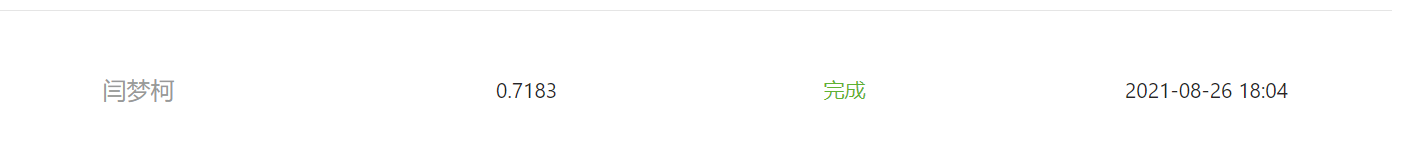

In [1]:
import pickle
with open('./train_3.pkl', 'rb') as file:
    train_raw2 = pickle.load(file)
train_raw2

,u1_customer_gender,u1_customer_province,u1_customer_city,u1_is_member,u1_try_customer_province_nunique,u1_try_customer_city_nunique,u1_try_customer_city_mode,u1_try_customer_province_mode,u2_raw_order_detail_id_last,u2_raw_order_id_last,...,u3_clear_user_participate,u3_clear_bargin_hunter_1,u3_clear_bargin_hunter_2,u3_clear_bargin_hunter_3,u3_clear_good_eb_0,u3_clear_good_eb_1,u3_clear_good_eb_2,u3_clear_good_eb_3,u3_clear_good_eb_4,label
1000000,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1000000.0,1000000.0,...,0.00000,0.000000,0.403918,0.000000,0.798603,1.116026,0.973293,-0.272175,-1.145431,0
1000034,0.0,12.0,23.0,1.0,1.0,1.0,23.0,12.0,1183975.0,1157250.0,...,0.00000,0.000000,0.333222,0.000000,1.034182,1.209541,1.464695,-0.200369,-1.204656,0
1000046,0.0,12.0,22.0,1.0,1.0,1.0,22.0,12.0,1148439.0,1126955.0,...,19.92897,0.000000,0.498750,0.000000,0.965197,-2.623748,-2.801107,0.330073,-0.476942,0
1000048,0.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2791333.0,2528288.0,...,0.00000,0.000000,0.374739,1.000000,0.798603,1.116026,0.973293,-0.272175,-1.145431,0
1000069,0.0,15.0,106.0,1.0,1.0,1.0,106.0,15.0,2874650.0,2599603.0,...,0.00000,0.000000,0.374660,0.000000,0.232183,-2.908259,-3.319890,0.736040,-2.681460,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2826569,0.0,2.0,144.0,1.0,1.0,1.0,144.0,2.0,3685485.0,3238353.0,...,0.00000,9.728766,0.312057,1.000000,1.209614,0.516993,1.069661,-0.065561,-0.901231,0
2826571,0.0,9.0,24.0,1.0,1.0,1.0,24.0,9.0,3685487.0,3238355.0,...,19.92897,0.000000,0.461124,0.000000,-1.461971,-0.492537,0.512837,-0.842079,-1.278745,0
2826572,0.0,2.0,121.0,1.0,1.0,1.0,121.0,2.0,3685494.0,3238357.0,...,0.00000,17.025340,0.343065,0.571429,-0.363025,1.802805,0.392007,-1.400281,-1.185509,0
2826573,0.0,27.0,213.0,1.0,1.0,1.0,213.0,27.0,3685495.0,3238358.0,...,0.00000,0.000000,0.301005,0.000000,-0.125839,1.648356,1.179755,-1.352094,-0.664661,0


In [2]:
with open('./test_3.pkl', 'rb') as file:
    test = pickle.load(file)
test

,u1_customer_gender,u1_customer_province,u1_customer_city,u1_is_member,u1_try_customer_province_nunique,u1_try_customer_city_nunique,u1_try_customer_city_mode,u1_try_customer_province_mode,u2_raw_order_detail_id_last,u2_raw_order_id_last,...,u3_clear_user_buy_freq,u3_clear_user_participate,u3_clear_bargin_hunter_1,u3_clear_bargin_hunter_2,u3_clear_bargin_hunter_3,u3_clear_good_eb_0,u3_clear_good_eb_1,u3_clear_good_eb_2,u3_clear_good_eb_3,u3_clear_good_eb_4
1000000,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1000000.0,1000000.0,...,6,0.000000,0.000000,0.403918,0.000000,0.106032,0.386286,1.194726,-0.763835,-0.037985
1000014,0.0,17.0,30.0,1.0,1.0,1.0,30.0,17.0,1181340.0,1155016.0,...,6,0.000000,0.000000,0.515012,0.000000,-1.704749,-1.530140,1.079090,-0.456051,-0.726256
1000034,0.0,12.0,23.0,1.0,1.0,1.0,23.0,12.0,1183974.0,1157250.0,...,1,0.000000,0.000000,0.333222,0.000000,0.458736,0.400779,1.377476,-0.612077,-0.105897
1000046,0.0,12.0,22.0,1.0,1.0,1.0,22.0,12.0,1148439.0,1126955.0,...,6,21.885933,0.000000,0.498750,0.000000,1.479443,-1.733027,-2.897245,0.460102,-1.121220
1000048,0.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2791333.0,2528288.0,...,6,0.000000,0.000000,0.374739,1.000000,0.106032,0.386286,1.194726,-0.763835,-0.037985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2826570,0.0,19.0,59.0,1.0,1.0,1.0,59.0,19.0,3685486.0,3238354.0,...,6,0.000000,0.000000,0.499750,0.000000,-0.056136,0.272527,1.836432,-0.006620,-2.278373
2826571,0.0,9.0,24.0,1.0,1.0,1.0,24.0,9.0,3685487.0,3238355.0,...,6,21.885933,0.000000,0.461124,0.000000,-1.704749,-1.530140,1.079090,-0.456051,-0.726256
2826572,0.0,2.0,121.0,1.0,1.0,1.0,121.0,2.0,3685494.0,3238357.0,...,2,0.000000,17.592495,0.343065,0.571429,-1.323631,0.953652,1.741731,-1.965826,0.003964
2826573,0.0,27.0,213.0,1.0,1.0,1.0,213.0,27.0,3685495.0,3238358.0,...,6,0.000000,0.000000,0.301005,0.000000,-1.001014,0.829671,2.435726,-1.540394,-0.402812


In [3]:
# 特征太多，运行不出来结果,取110个特征
train_raw2 = train_raw2.iloc[:,90:]
test = test.iloc[:,90:]

In [4]:
# reset_index 目的是做统一的逻辑，reset_index后把原来的index customer_id 当成了一个固定的列
train_raw2 = train_raw2.reset_index()
test = test.reset_index()

In [5]:
X_data = train_raw2.drop(['label', 'index'], axis=1)
Y_data = train_raw2['label']
X_test = test.drop('index', axis=1)

In [6]:
import lightgbm as lgb
# LGBMClassifier经验参数
clf = lgb.LGBMClassifier(
            num_leaves=2**5-1, reg_alpha=0.25, reg_lambda=0.25, objective='binary',
            max_depth=-1, learning_rate=0.005, min_child_samples=3, random_state=2021,
            n_estimators=2000, subsample=1, colsample_bytree=1,
        )

In [7]:
%%time
clf.fit(X_data, Y_data)

CPU times: user 59min 59s, sys: 5min 12s, total: 1h 5min 11s
Wall time: 2min 13s


LGBMClassifier(colsample_bytree=1, learning_rate=0.005, min_child_samples=3,
               n_estimators=2000, objective='binary', random_state=2021,
               reg_alpha=0.25, reg_lambda=0.25, subsample=1)

In [8]:
y_pred = clf.predict_proba(X_test)[:, 1]

In [9]:
import pandas as pd
result = pd.read_csv('./submittion.csv')
result['result'] = y_pred

In [10]:
# 借鉴优秀作业，调整阈值为均值
# tem_df = test_x

# # 使用数据集进行预测
# pred_y_proba = model.predict_proba(tem_df)[:,1]

pred_y_proba = y_pred
# 查询阈值的平均水平
mean_threshold = pred_y_proba.mean()
# 重新设置阈值、输出预测结果
pred_y = pd.Series(pred_y_proba).apply(lambda x:1 if x >= mean_threshold else 0)
pred_df = pd.DataFrame(pred_y,columns=["result"]).set_index(result.customer_id)
pred_df = pred_df.reset_index()
pred_df = pred_df.rename(columns={"index":"customer_id"})
pred_df["result"].value_counts()

# 保存结果
pred_df.to_csv('./baseline9.csv', index=False)

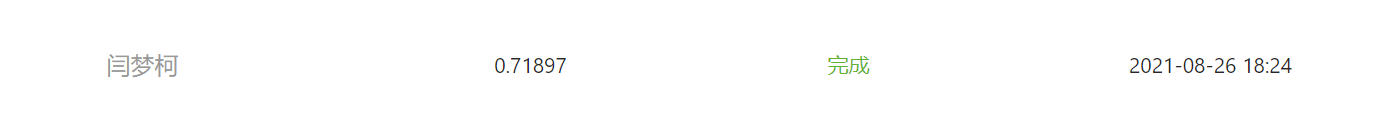